In [0]:
dbutils.fs.ls("/FileStore/tables")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709126857000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1706710326000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706707446000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021/', name='clinicaltrial_2021/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1712533828000),
 FileInfo(path='d

In [0]:
# variable declaration

clinicaltrial_2023 = "clinicaltrial_2023"
pharma = "pharma"


In [0]:
# copy to a temp folder

dbutils.fs.cp("/FileStore/tables/" + clinicaltrial_2023  + ".zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/" + pharma + ".zip", "file:/tmp/")

Out[3]: True

In [0]:
#  make variable accessible by the command line

import os
os.environ['clinicaltrial_2023'] = clinicaltrial_2023

import os
os.environ['pharma'] = pharma

In [0]:
%sh

ls /tmp

Rserv
RtmpEHIQ2y
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-48ef023e17a440a48b35032189520312-apache2.service-o9mbXh
systemd-private-48ef023e17a440a48b35032189520312-ntp.service-u7sIwh
systemd-private-48ef023e17a440a48b35032189520312-systemd-logind.service-8ktgoi
systemd-private-48ef023e17a440a48b35032189520312-systemd-resolved.service-F6mlti
tmp.7G3GB2uONK


In [0]:

%sh
unzip -d /tmp/ /tmp/clinicaltrial_2023.zip
unzip -d /tmp/ /tmp/pharma.zip


Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
%sh

ls /tmp/$clinicaltrial_2023.csv
ls /tmp/$pharma.csv

/tmp/clinicaltrial_2023.csv
/tmp/pharma.csv


In [0]:
# making a new directory

dbutils.fs.mkdirs("/FileStore/tables/" + clinicaltrial_2023)
dbutils.fs.mkdirs("/FileStore/tables/" + pharma)

Out[8]: True

In [0]:
# Moving to DBFS

dbutils.fs.mv("file:/tmp/" +  clinicaltrial_2023 + ".csv", "/FileStore/tables/" +  clinicaltrial_2023 + ".csv", True)
dbutils.fs.mv("file:/tmp/" + pharma + ".csv", "/FileStore/tables/" + pharma + ".csv", True)

Out[9]: True

In [0]:
# Check to confirm that the files are in the directory directory

dbutils.fs.ls("/FileStore/tables/")

Out[10]: [FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709126857000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1706710326000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706707446000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021/', name='clinicaltrial_2021/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1712533828000),
 FileInfo(path='

In [0]:
dbutils.fs.head("/FileStore/tables/" + clinicaltrial_2023 + ".csv")

[Truncated to first 65536 bytes]
Out[11]: '"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02

In [0]:
# CREATE RDD FOR CLINICAL TRIALS

# defines a function to read and convert the clinicaltrial data into RDD

def load_clinical_trial_data(clinicaltrial_2023):
    """
    Load clinical trial data from a CSV file into an RDD.

    Parameters:
        clinicaltrial_2023 (str): The name of the CSV file to load.

    Returns:
        pyspark.rdd.RDD: An RDD containing the clinical trial data.
    """
    rdd = sc.textFile("/FileStore/tables/" + clinicaltrial_2023 + ".csv")
    return rdd


In [0]:
# CREATE RDD FOR pharmaceutical data

# defines a function to read and convert the pharmaceutical data into RDD


def load_pharma_data(pharma):
    """
    Load pharmaceutical data from a CSV file into an RDD.

    Parameters:
        pharma (str): The name of the pharmaceutical data CSV file.

    Returns:
        pyspark.rdd.RDD: An RDD containing the pharmaceutical data.
    """
    prdd = sc.textFile("/FileStore/tables/" + pharma + ".csv")
    return prdd


In [0]:
# Removing the delimeters

delimiter_selector = {
    "clinicaltrial_2023": "\t",
    "clinicaltrial_2021": "|",
    "clinicaltrial_2020": "|",
    "pharma": ","
}

def clean_clinical_rdd(crdd, clinicaltrial_2023):
    """
    Clean the clinical trial RDD by splitting each line using the delimiter
    specified by the file type and removing unwanted characters.

    Parameters:
        crdd (pyspark.rdd.RDD): The RDD containing clinical trial data.
        clinicaltrial_2023 (str): The name of the clinical trial file.

    Returns:
        pyspark.rdd.RDD: The cleaned RDD.
    """
    CLEAN_CRDD = crdd.map(lambda x: x.split(delimiter_selector[clinicaltrial_2023])).map(lambda x: [i.replace(",",'').replace('"','')for i in x])
    return CLEAN_CRDD

def clean_pharma_rdd(prdd, pharma):
    """
    Clean the pharmaceutical RDD by splitting each line using the delimiter
    specified by the file type and removing unwanted characters.

    Parameters:
        prdd (pyspark.rdd.RDD): The RDD containing pharmaceutical data.
        pharma_file (str): The name of the pharmaceutical file.

    Returns:
        pyspark.rdd.RDD: The cleaned RDD.
    """
    CLEAN_PRDD = prdd.map(lambda x: x.split(delimiter_selector[pharma])).map(lambda x: [i.replace(",",'').replace('"','')for i in x])
    return CLEAN_PRDD


In [0]:
# Creating new RDD  after cleaning the data

# Creating the new RDD
Clinical_RDD = load_clinical_trial_data(clinicaltrial_2023)
PHARMA_RDD = load_pharma_data(pharma)

# Cleaning the RDD
Clinical_RDD_Clean = clean_clinical_rdd(Clinical_RDD, clinicaltrial_2023)
PHARMA_RDD_Clean = clean_pharma_rdd(PHARMA_RDD, pharma)

# Take first 5 elements from cleaned Clinical RDD
Clinical_RDD_Clean.take(5)

Out[15]: [['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Fun

In [0]:
PHARMA_RDD_Clean.take(5)

Out[16]: [['Company',
  'Parent_Company',
  'Penalty_Amount',
  'Subtraction_From_Penalty',
  'Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting',
  'Penalty_Year',
  'Penalty_Date',
  'Offense_Group',
  'Primary_Offense',
  'Secondary_Offense',
  'Description',
  'Level_of_Government',
  'Action_Type',
  'Agency',
  'Civil/Criminal',
  'Prosecution_Agreement',
  'Court',
  'Case_ID',
  'Private_Litigation_Case_Title',
  'Lawsuit_Resolution',
  'Facility_State',
  'City',
  'Address',
  'Zip',
  'NAICS_Code',
  'NAICS_Translation',
  'HQ_Country_of_Parent',
  'HQ_State_of_Parent',
  'Ownership_Structure',
  'Parent_Company_Stock_Ticker',
  'Major_Industry_of_Parent',
  'Specific_Industry_of_Parent',
  'Info_Source',
  'Notes'],
 ['Abbott Laboratories',
  'Abbott Laboratories',
  '$5',
  '475',
  '000',
  '$0',
  '$5',
  '475',
  '000',
  '2013',
  '20131227',
  'government-contracting-related offenses',
  'False Claims Act and related',
  'kickbacks and bribery',
  "Abbott Labo

In [0]:
#filtering empty row in pharma
pharma_rdd_filtered = PHARMA_RDD_Clean.filter(lambda x: len(x) == 34)

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
pharma_schema = StructType([
    StructField("Company", StringType(), True),
    StructField("Parent_Company", StringType(), True),
    StructField("Penalty_Amount", StringType(), True),
    StructField("Subtraction_From_Penalty", StringType(), True),
    StructField("Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting", StringType(), True),
    StructField("Penalty_Year", StringType(), True),
    StructField("Penalty_Date", StringType(), True),
    StructField("Offense_Group", StringType(), True),
    StructField("Primary_Offense", StringType(), True),
    StructField("Secondary_Offense", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Level_of_Government", StringType(), True),
    StructField("Action_Type", StringType(), True),
    StructField("Agency", StringType(), True),
    StructField("Civil_Criminal", StringType(), True),
    StructField("Prosecution_Agreement", StringType(), True),
    StructField("Court", StringType(), True),
    StructField("Case_ID", StringType(), True),
    StructField("Private_Litigation_Case_Title", StringType(), True),
    StructField("Lawsuit_Resolution", StringType(), True),
    StructField("Facility_State", StringType(), True),
    StructField("City", StringType(), True),
    StructField("Address", StringType(), True),
    StructField("Zip", StringType(), True),
    StructField("NAICS_Code", StringType(), True),
    StructField("NAICS_Translation", StringType(), True),
    StructField("HQ_Country_of_Parent", StringType(), True),
    StructField("HQ_State_of_Parent", StringType(), True),
    StructField("Ownership_Structure", StringType(), True),
    StructField("Parent_Company_Stock_Ticker", StringType(), True),
    StructField("Major_Industry_of_Parent", StringType(), True),
    StructField("Specific_Industry_of_Parent", StringType(), True),
    StructField("Info_Source", StringType(), True),
    StructField("Notes", StringType(), True)
])

# Convert RDD to DataFrame with defined schema
pharma_df = spark.createDataFrame(pharma_rdd_filtered, schema=pharma_schema)

# Show the DataFrame
pharma_df.show(5, truncate=False)


+-------+--------------+--------------+------------------------+---------------------------------------------------------+------------+------------+-------------+---------------+-----------------+-----------+-------------------+-----------+------+--------------+---------------------+-----+-------+-----------------------------+------------------+--------------+----+-------+---+----------+-----------------+--------------------+------------------+-------------------+---------------------------+------------------------+---------------------------+-----------+-----+
|Company|Parent_Company|Penalty_Amount|Subtraction_From_Penalty|Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting|Penalty_Year|Penalty_Date|Offense_Group|Primary_Offense|Secondary_Offense|Description|Level_of_Government|Action_Type|Agency|Civil_Criminal|Prosecution_Agreement|Court|Case_ID|Private_Litigation_Case_Title|Lawsuit_Resolution|Facility_State|City|Address|Zip|NAICS_Code|NAICS_Translation|HQ_Country_of_Parent|HQ_

In [0]:
#### filtering
clinical_rdd_filtered = Clinical_RDD_Clean.filter(lambda x: len(x) == 14)

In [0]:
from pyspark.sql.types import *
myschema = StructType([
    StructField("Id", StringType(), True),
    StructField("Study Title", StringType(), True),
    StructField("Acronym", StringType(), True),
    StructField("Status", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Collaborators", StringType(), True),
    StructField("Enrollment", StringType(), True),
    StructField("Funder Type", StringType(), True),
    StructField("Type", StringType(), True),
    StructField("Study Design", StringType(), True),
    StructField("Start", StringType(), True),
    StructField("Completion", StringType(), True)
])
clinical_df = spark.createDataFrame(clinical_rdd_filtered, schema=myschema)
clinical_df.show(5, truncate=False)


+-----------+-------------------------------------------------------------------------------------------------------------------+---------+----------+------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+---------------------------------------+------------------------------------------------------------------------------------+----------+-----------+--------------+------------------------------------------------------------------------------------------------------------------------------------------------+----------+----------+
|Id         |Study Title                                                                                                        |Acronym  |Status    |Conditions                                                                          |Interventions                                                                          |Sponsor                

In [0]:
clinical_df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Study Title: string (nullable = true)
 |-- Acronym: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Collaborators: string (nullable = true)
 |-- Enrollment: string (nullable = true)
 |-- Funder Type: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Study Design: string (nullable = true)
 |-- Start: string (nullable = true)
 |-- Completion: string (nullable = true)



In [0]:
#Q1
from pyspark.sql import SparkSession
from pyspark.sql.functions import countDistinct
# Count the number of distinct studies
distinct_studies_count = clinical_df.select(countDistinct("Id").alias("Total Studies"))
# Show the result
distinct_studies_count.show()


+-------------+
|Total Studies|
+-------------+
|       483421|
+-------------+



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import countDistinct
distinct_studies_count = clinical_df.select(countDistinct("Id").alias("Total Studies"))
result = distinct_studies_count.collect()

for row in result:
    print(f"Total Studies: {row['Total Studies']}")


Total Studies: 483421


In [0]:
#Q2
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col
# Filter out rows where 'Type' column is null, empty, or equals to 'Type'
filtered_df = clinical_df.filter((col("Type").isNotNull()) & (col("Type") != "") & (col("Type") != "Type"))

# Group by 'Type' column and count the occurrences
type_counts_df = filtered_df.groupBy("Type") \
    .agg(count("*").alias("Frequency")) \
    .orderBy(desc("Frequency"))

# Show the DataFrame
type_counts_df.show(truncate=False)


+---------------+---------+
|Type           |Frequency|
+---------------+---------+
|INTERVENTIONAL |371382   |
|OBSERVATIONAL  |110221   |
|EXPANDED_ACCESS|928      |
+---------------+---------+



In [0]:
#Q3
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col

# Group by 'Conditions' column and count the occurrences
top_conditions_df = clinical_df.filter(col("Conditions") != "") \
    .groupBy("Conditions") \
    .agg(count("*").alias("Frequency")) \
    .orderBy(desc("Frequency")) \
    .limit(5)

# Show the DataFrame
top_conditions_df.show(truncate=False)


+---------------+---------+
|Conditions     |Frequency|
+---------------+---------+
|Healthy        |7997     |
|Breast Cancer  |4556     |
|Prostate Cancer|2650     |
|Asthma         |2309     |
|Obesity        |2284     |
+---------------+---------+



In [0]:
#Q4
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc

# Join the clinical_df with PHARMA_RDD_Clean
joined_df = clinical_df.join(pharma_df, clinical_df['Sponsor'] == pharma_df['Parent_Company'], "left_outer")

# Filter out rows where Parent_Company is null (non-pharmaceutical companies)
filtered_df = joined_df.filter(joined_df['Parent_Company'].isNull())

# Count the number of clinical trials sponsored by each sponsor
sponsors_count = filtered_df.groupBy('Sponsor').agg(count('*').alias('TotalTrials'))

# Get the top 10 sponsors by the number of trials
top_10_sponsors = sponsors_count.orderBy(desc('TotalTrials')).limit(10)

# Show the result
top_10_sponsors.show()


+--------------------+-----------+
|             Sponsor|TotalTrials|
+--------------------+-----------+
|     GlaxoSmithKline|       3482|
|National Cancer I...|       3410|
|   Assiut University|       3335|
|              Pfizer|       3045|
|         AstraZeneca|       3024|
|    Cairo University|       3023|
|Assistance Publiq...|       2951|
|         Mayo Clinic|       2766|
|M.D. Anderson Can...|       2702|
|Novartis Pharmace...|       2393|
+--------------------+-----------+



In [0]:
#Q5

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, expr, lpad


# Define a DataFrame for month mapping
month_mapping_data = [
    ('01', 'Jan'),
    ('02', 'Feb'),
    ('03', 'Mar'),
    ('04', 'Apr'),
    ('05', 'May'),
    ('06', 'Jun'),
    ('07', 'Jul'),
    ('08', 'Aug'),
    ('09', 'Sept'),
    ('10', 'Oct'),
    ('11', 'Nov'),
    ('12', 'Dec')
]
month_mapping_df = spark.createDataFrame(month_mapping_data, ["month_num", "month_name"])

# Define completed studies DataFrame
completed_studies_df = clinical_df \
    .filter((col("Completion").substr(1, 4) == "2023") & (col("Status").isin("COMPLETED", "Completed"))) \
    .groupBy(col("Completion").substr(6, 2).alias("completion_month")) \
    .agg(count("*").alias("study_count"))

# Map month abbreviations to full names
mapped_months_df = month_mapping_df \
    .join(completed_studies_df, month_mapping_df["month_num"] == lpad(completed_studies_df["completion_month"], 2, '0'), "left") \
    .select("month_name", expr("COALESCE(study_count, 0)").alias("completed_studies"))

# Order the DataFrame by month
result_df = mapped_months_df.orderBy(
    expr("""
        CASE month_name
            WHEN 'Jan' THEN 1
            WHEN 'Feb' THEN 2
            WHEN 'Mar' THEN 3
            WHEN 'Apr' THEN 4
            WHEN 'May' THEN 5
            WHEN 'Jun' THEN 6
            WHEN 'Jul' THEN 7
            WHEN 'Aug' THEN 8
            WHEN 'Sept' THEN 9
            WHEN 'Oct' THEN 10
            WHEN 'Nov' THEN 11
            WHEN 'Dec' THEN 12
        END
    """)
)

# Show the result
result_df.show()


+----------+-----------------+
|month_name|completed_studies|
+----------+-----------------+
|       Jan|             1494|
|       Feb|             1272|
|       Mar|             1552|
|       Apr|             1324|
|       May|             1415|
|       Jun|             1619|
|       Jul|             1360|
|       Aug|             1230|
|      Sept|             1152|
|       Oct|             1058|
|       Nov|              909|
|       Dec|             1082|
+----------+-----------------+



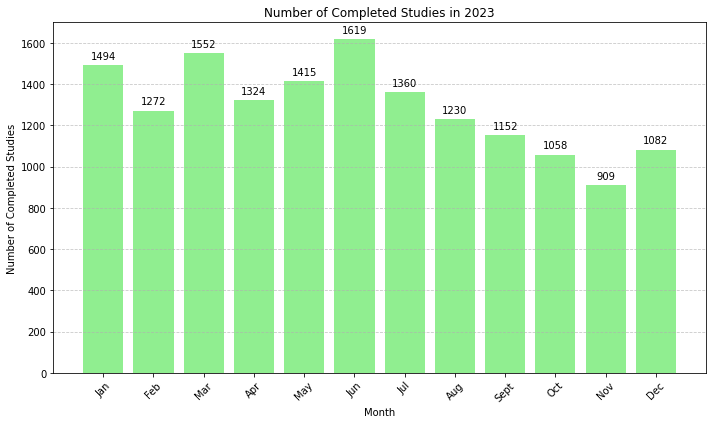

In [0]:

import matplotlib.pyplot as plt

# Data
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
completed_studies = [1494, 1272, 1552, 1324, 1415, 1619, 1360, 1230, 1152, 1058, 909, 1082]

# Create bar plot with visual distinction
plt.figure(figsize=(10, 6))
bars = plt.bar(months, completed_studies, color=['lightgreen'])
plt.title('Number of Completed Studies in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval), ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

In [0]:
#FURTHER ANALYSIS RECRUITING STUDY 
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, expr, lpad
month_mapping_data = [
    ('01', 'Jan'),
    ('02', 'Feb'),
    ('03', 'Mar'),
    ('04', 'Apr'),
    ('05', 'May'),
    ('06', 'Jun'),
    ('07', 'Jul'),
    ('08', 'Aug'),
    ('09', 'Sept'),
    ('10', 'Oct'),
    ('11', 'Nov'),
    ('12', 'Dec')
]
month_mapping_df = spark.createDataFrame(month_mapping_data, ["month_num", "month_name"])
completed_studies_df = clinical_df \
    .filter((col("Completion").substr(1, 4) == "2023") & (col("Status").isin("RECRUITING", "Recruiting"))) \
    .groupBy(col("Completion").substr(6, 2).alias("completion_month")) \
    .agg(count("*").alias("study_count"))

mapped_months_df = month_mapping_df \
    .join(completed_studies_df, month_mapping_df["month_num"] == lpad(completed_studies_df["completion_month"], 2, '0'), "left") \
    .select("month_name", expr("COALESCE(study_count, 0)").alias("Studies_Recruiting"))

result_df = mapped_months_df.orderBy(
    expr("""
        CASE month_name
            WHEN 'Jan' THEN 1
            WHEN 'Feb' THEN 2
            WHEN 'Mar' THEN 3
            WHEN 'Apr' THEN 4
            WHEN 'May' THEN 5
            WHEN 'Jun' THEN 6
            WHEN 'Jul' THEN 7
            WHEN 'Aug' THEN 8
            WHEN 'Sept' THEN 9
            WHEN 'Oct' THEN 10
            WHEN 'Nov' THEN 11
            WHEN 'Dec' THEN 12
        END
    """)
)
result_df.show()


+----------+------------------+
|month_name|Studies_Recruiting|
+----------+------------------+
|       Jan|               238|
|       Feb|               193|
|       Mar|               368|
|       Apr|               330|
|       May|               396|
|       Jun|               667|
|       Jul|               511|
|       Aug|               552|
|      Sept|               680|
|       Oct|               666|
|       Nov|               552|
|       Dec|              3761|
+----------+------------------+



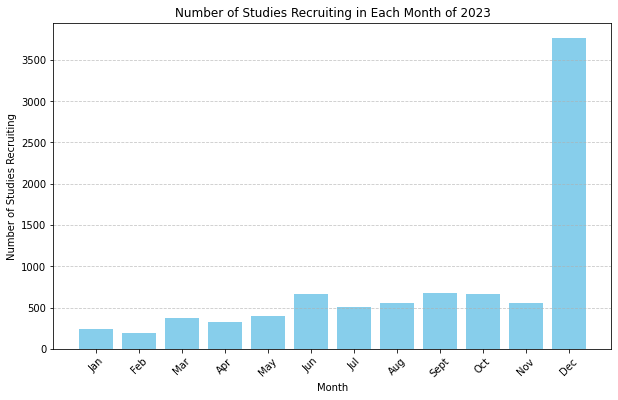

In [0]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
result_pandas_df = result_df.toPandas()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(result_pandas_df['month_name'], result_pandas_df['Studies_Recruiting'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Studies Recruiting')
plt.title('Number of Studies Recruiting in Each Month of 2023')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [0]:
#FURTHER ANALYSIS NOT YET RECRUITING
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, expr, lpad
month_mapping_data = [
    ('01', 'Jan'),
    ('02', 'Feb'),
    ('03', 'Mar'),
    ('04', 'Apr'),
    ('05', 'May'),
    ('06', 'Jun'),
    ('07', 'Jul'),
    ('08', 'Aug'),
    ('09', 'Sept'),
    ('10', 'Oct'),
    ('11', 'Nov'),
    ('12', 'Dec')
]
month_mapping_df = spark.createDataFrame(month_mapping_data, ["month_num", "month_name"])
completed_studies_df = clinical_df \
    .filter((col("Completion").substr(1, 4) == "2023") & (col("Status").isin("NOT_YET_RECRUITING", "Not_YetRecruiting"))) \
    .groupBy(col("Completion").substr(6, 2).alias("completion_month")) \
    .agg(count("*").alias("study_count"))

mapped_months_df = month_mapping_df \
    .join(completed_studies_df, month_mapping_df["month_num"] == lpad(completed_studies_df["completion_month"], 2, '0'), "left") \
    .select("month_name", expr("COALESCE(study_count, 0)").alias("Not_Yet_Recruiting_Studies"))

result_df = mapped_months_df.orderBy(
    expr("""
        CASE month_name
            WHEN 'Jan' THEN 1
            WHEN 'Feb' THEN 2
            WHEN 'Mar' THEN 3
            WHEN 'Apr' THEN 4
            WHEN 'May' THEN 5
            WHEN 'Jun' THEN 6
            WHEN 'Jul' THEN 7
            WHEN 'Aug' THEN 8
            WHEN 'Sept' THEN 9
            WHEN 'Oct' THEN 10
            WHEN 'Nov' THEN 11
            WHEN 'Dec' THEN 12
        END
    """)
)
result_df.show()


+----------+--------------------------+
|month_name|Not_Yet_Recruiting_Studies|
+----------+--------------------------+
|       Jan|                        70|
|       Feb|                        84|
|       Mar|                       119|
|       Apr|                       121|
|       May|                       127|
|       Jun|                       182|
|       Jul|                       162|
|       Aug|                       164|
|      Sept|                       214|
|       Oct|                       191|
|       Nov|                       170|
|       Dec|                       714|
+----------+--------------------------+



In [0]:
#FURTHER ANALYSIS TERMINATED STUDIES
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, expr, lpad
month_mapping_data = [
    ('01', 'Jan'),
    ('02', 'Feb'),
    ('03', 'Mar'),
    ('04', 'Apr'),
    ('05', 'May'),
    ('06', 'Jun'),
    ('07', 'Jul'),
    ('08', 'Aug'),
    ('09', 'Sept'),
    ('10', 'Oct'),
    ('11', 'Nov'),
    ('12', 'Dec')
]
month_mapping_df = spark.createDataFrame(month_mapping_data, ["month_num", "month_name"])
completed_studies_df = clinical_df \
    .filter((col("Completion").substr(1, 4) == "2023") & (col("Status").isin("TERMINATED", "Terminated"))) \
    .groupBy(col("Completion").substr(6, 2).alias("completion_month")) \
    .agg(count("*").alias("study_count"))

mapped_months_df = month_mapping_df \
    .join(completed_studies_df, month_mapping_df["month_num"] == lpad(completed_studies_df["completion_month"], 2, '0'), "left") \
    .select("month_name", expr("COALESCE(study_count, 0)").alias("TERMINATED STUDIES"))

result_df = mapped_months_df.orderBy(
    expr("""
        CASE month_name
            WHEN 'Jan' THEN 1
            WHEN 'Feb' THEN 2
            WHEN 'Mar' THEN 3
            WHEN 'Apr' THEN 4
            WHEN 'May' THEN 5
            WHEN 'Jun' THEN 6
            WHEN 'Jul' THEN 7
            WHEN 'Aug' THEN 8
            WHEN 'Sept' THEN 9
            WHEN 'Oct' THEN 10
            WHEN 'Nov' THEN 11
            WHEN 'Dec' THEN 12
        END
    """)
)
result_df.show()


+----------+------------------+
|month_name|TERMINATED STUDIES|
+----------+------------------+
|       Jan|               150|
|       Feb|               146|
|       Mar|               164|
|       Apr|               118|
|       May|               142|
|       Jun|               127|
|       Jul|               115|
|       Aug|               114|
|      Sept|               103|
|       Oct|                99|
|       Nov|                99|
|       Dec|                83|
+----------+------------------+

